---
author: Rishabh Mondal
title: Different Distribution Samples 
date: '2023-02-07'
---

### Bernoulli, Categorical, Uniform, Normal, Beta and Gamma distributions

In [43]:
#Important libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.distributions as dist
import math
import hamiltorch
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())

In [33]:
#pre-defined values
n_samples=10000
seed=42
p=0.4
num_categories=5


### Generate uniform distribution using PyTorch distribution

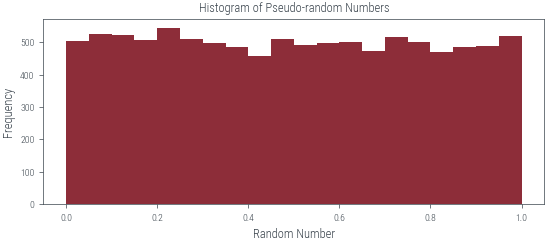

In [28]:
# Generate random numbers using PyTorch distribution
distribution = torch.distributions.Uniform(0, 1)
random_numbers = distribution.sample((n_samples,))

# Plot the histogram
plt.hist(random_numbers.numpy(), bins=20)
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.title('Histogram of Pseudo-random Numbers')
plt.show()

### Generate Bernoulli distribution using PyTorch distribution

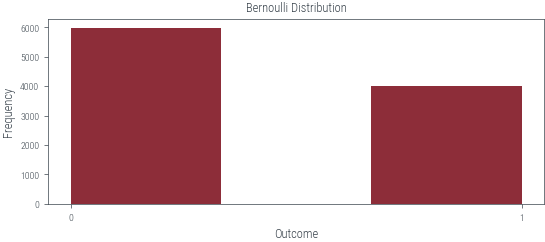

In [31]:
from torch.distributions import Bernoulli

# Set the random seed for reproducibility
torch.manual_seed(seed)

# Generate samples from the distribution
Bernoulli_samples = Bernoulli(torch.tensor([p])).sample((n_samples,))


# Plot the histogram
plt.hist(Bernoulli_samples.numpy(), bins=3)

# Add labels and title
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Bernoulli Distribution')

# Set x-axis tick labels
plt.xticks([0, 1], ['0', '1'])

# Display the plot
plt.show()







### Generate Categorical distribution using PyTorch distribution

tensor([2006, 1983, 2087, 1894, 2030])


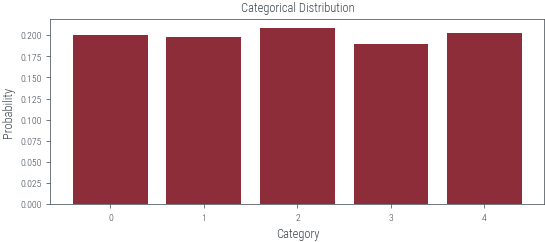

In [42]:
from torch.distributions import Categorical

# Create a Categorical distribution with equal probabilities for each category
categorical_distribution = Categorical(torch.ones(num_categories))
categorical_numbers = categorical_distribution.sample((n_samples,))

# Count the occurrences of each category
category_counts = torch.bincount(categorical_numbers)
print(category_counts)

# Compute the probabilities
probabilities = category_counts / n_samples

# Plot the categories with probabilities
plt.bar(range(len(probabilities)), probabilities)
plt.xlabel('Category')
plt.ylabel('Probability')
plt.title('Categorical Distribution')
plt.show()


### Generate Normal distribution using PyTorch distribution

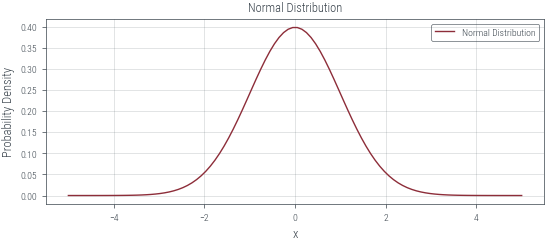

In [44]:
from torch.distributions import Normal

# Define the mean and standard deviation
mean = torch.tensor([0.0])
stddev = torch.tensor([1.0])

dist = Normal(mean, stddev)

# Generate a range of values for x-axis
x = np.linspace(-5, 5, 100)

# Calculate the corresponding probability density for each x
pdf = torch.exp(dist.log_prob(torch.tensor(x))).numpy()

# Plot the normal distribution
plt.plot(x, pdf, label='Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Normal Distribution')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


**Implementing a pseudo-random number generator (PRNG)** - Generates a sequence of numbers that exhibit properties of randomness

**Linear Congruential Generator (LCG)** is a simple PRNG algorithm - The LCG algorithm is defined by the recurrence relation:

$X_{n+1} = (a \cdot X_n + c) \mod m$

- $X_{n+1}$ is the Next pseudo-random number.
- $X_n$ is the current pseudo-random number.
- $a$ is the multiplier , determines the period of the generated number.
- $c$ is the increment, shifts the generated sequence.
- $m$ is the modulus, determines the range of values .


***Integer Constant***

$m,{0<m}$ — The modulus

$a,0<a<m$ — The multiplier

$c,0<=c<m$ — The increment

$X_{0},0<X_{0}<m$ — The seed / start value



In [3]:
# Function for Linear Congruential Generator
def lcg(seed, n_samples):
    """
    Generates a sequence of pseudo-random numbers using the Linear Congruential Generator (LCG) algorithm.

    Args:
        seed (int): The seed value for the LCG algorithm.
        n_samples (int): The number of random numbers to generate.

    Returns:
        list: A list of pseudo-random numbers normalized to the range [0, 1].
    """
    a = 1103515245
    c = 12345
    m = 2 ** 31
    random_numbers = []

    for _ in range(n_samples):
        seed = (a * seed + c) % m
        random_number = seed / m  # Normalize to range [0, 1]
        random_numbers.append(random_number)

    return random_numbers


Plot histogram

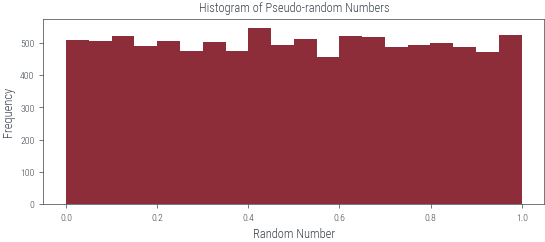

In [21]:

# Example usage:
random_numbers = lcg(seed, n_samples )

plt.hist(random_numbers, bins=20)
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.title('Histogram of Pseudo-random Numbers')
plt.show()

In a ***uniform distribution***, all values have an equal chance of occurring. The graph of this distribution shows bars or lines of equal height for each outcome, creating a ***rectangular shape***. For example, when drawing from a standard deck, the probability of selecting a heart or a spade is 1/4 or 25%.

**Using PyTorch**

Convert **Unifom Sampling** to **Bernoulli Sampling**  

we can use the probablity $(p)$ of outcome 1 and $(1-p)$ of outcome 0

***Uniform Sampling*** Each element has an equal probability. Graphically, a ***rectangular distribution*** is formed with uniform bars or lines in case of ***Bernoulli Sampling*** Two outcomes, success and failure, with associated probabilities (p and (1-p)). Graphically, ***two bars or lines*** 
represent the distribution, one taller than the other.

***Function for uniform to Categorical***


***Plot of Uniform to Categorical distribution***

***Categorical Distribution*** multiple outcomes with ***different probabilities***. Example: A fruit survey with apple (P = 0.4), banana (P = 0.3), and orange (P = 0.3). Graphically, bars represent each fruit choice.

### Uniform to Normal sampling

***Box Muller Method***

In [27]:
def uniform_to_normal_boxmuller(n_samples):
    """
    Generates a sequence of pseudo-random numbers from a standard normal distribution using the Box-Muller method.

    Args:
        n_samples (int): The number of random numbers to generate.

    Returns:
        torch.Tensor: A tensor of pseudo-random numbers following the standard normal distribution.
    """
    uniform_distribution = dist.Uniform(0, 1)
    random_numbers = []

    for _ in range(n_samples // 2):
        u1 = uniform_distribution.sample()
        u2 = uniform_distribution.sample()

        z1 = torch.sqrt(-2 * torch.log(u1)) * torch.cos(2 * math.pi * u2)
        z2 = torch.sqrt(-2 * torch.log(u1)) * torch.sin(2 * math.pi * u2)

        random_numbers.append(z1)
        random_numbers.append(z2)

    if n_samples % 2 != 0:
        u = uniform_distribution.sample()
        z = torch.sqrt(-2 * torch.log(u)) * torch.cos(2 * math.pi * uniform_distribution.sample())
        random_numbers.append(z)

    return torch.stack(random_numbers)

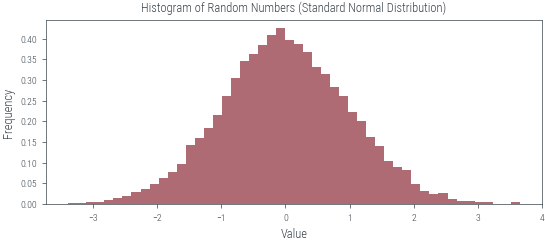

In [28]:
random_numbers = uniform_to_normal_boxmuller(10000)

# Plot the histogram of random numbers
plt.hist(random_numbers, bins=50, density=True, alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Random Numbers (Standard Normal Distribution)')
plt.show()

In ***Normal Distribution*** Values are ***symmetrically distributed*** around a central mean. For example, heights in a population follow a ***bell-shaped*** curve, with the most common values near the mean and fewer occurrences as we move away from it. Graphically, it is represented by a bell-shaped curve.